In [43]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/gdrive')
info = pd.read_csv('/content/gdrive/My Drive/dth_data_1.csv')
info.keys()




Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Index(['names', 'address', 'city', 'phone_number', 'dth_pack',
       'subscription_status', 'customer_class', 'ott_subscription',
       'dth_pack_price', 'no_of_channels', 'active_since', 'viewtime',
       'churn'],
      dtype='object')

In [44]:
info.head()


,names,address,city,phone_number,dth_pack,subscription_status,customer_class,ott_subscription,dth_pack_price,no_of_channels,active_since,viewtime,churn
0,Autumn Jackson,"1166 Max Pine,Selenastad, OR 84999",Nicholasview,001-299-668-9887x055,Standard,True,Individual,None,350,400,1245,315,False
1,Tiffany Molina,"2897 Kari Skyway,Thomasside, ID 62645",New Davidtown,986-452-8168x704,HD,True,Individual,None,500,450,164,77,False
2,Andre King,"9308 Williams Islands,Shawnborough, UT 79074",Michaelshire,+1-652-466-9356x692,HD,True,Individual,None,500,450,773,27,True
3,Dale Franco,"989 Elizabeth Isle,Mayport, DC 08154",Lake Margaret,238.412.9721x813,HD,False,Home,Hulu,500,450,0,5632,True
4,Kimberly Taylor,"Unit 8082 Box 6829,DPO AP 84673",Justinbury,530.337.6650x868,Standard,True,Home,Netflix,350,400,814,91,False


In [45]:
info.describe()

,dth_pack_price,no_of_channels,active_since,viewtime
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,414.530000,419.840000,758.875600,1414.871700
std,111.940306,33.158473,661.192627,2483.106234
min,350.000000,400.000000,0.000000,1.000000
25%,350.000000,400.000000,11.750000,105.000000
50%,350.000000,400.000000,673.500000,304.000000
75%,500.000000,450.000000,1347.000000,775.500000
max,700.000000,500.000000,1999.000000,9996.000000


In [46]:
info.dtypes

info["churn"].value_counts()

False    7009
True     2991
Name: churn, dtype: int64

In [47]:
# Analysis Using View time

In [48]:
info.replace([np.inf, -np.inf], np.nan, inplace=True)
info.dropna(inplace=True) 

In [49]:
info['no_of_hr']=(info['viewtime']/(info['active_since']*24))*100
info['no_of_hr']

0       1.054217
1       1.956301
2       0.145537
3            inf
4       0.465807
          ...   
9995    1.816848
9996         inf
9997         inf
9998    1.819290
9999    0.530861
Name: no_of_hr, Length: 10000, dtype: float64

In [50]:
sum = 0
for i in info['no_of_hr']:
  sum=sum+i

Perameter=sum/10000
print(Perameter)

inf


In [51]:
prob = []
for i in info['no_of_hr']:
  if i >= Perameter:
    prob.append('Stay')

  else:
    prob.append('Leave')

info['prob']= prob
info

,names,address,city,phone_number,dth_pack,subscription_status,customer_class,ott_subscription,dth_pack_price,no_of_channels,active_since,viewtime,churn,no_of_hr,prob
0,Autumn Jackson,"1166 Max Pine,Selenastad, OR 84999",Nicholasview,001-299-668-9887x055,Standard,True,Individual,None,350,400,1245,315,False,1.054217,Leave
1,Tiffany Molina,"2897 Kari Skyway,Thomasside, ID 62645",New Davidtown,986-452-8168x704,HD,True,Individual,None,500,450,164,77,False,1.956301,Leave
2,Andre King,"9308 Williams Islands,Shawnborough, UT 79074",Michaelshire,+1-652-466-9356x692,HD,True,Individual,None,500,450,773,27,True,0.145537,Leave
3,Dale Franco,"989 Elizabeth Isle,Mayport, DC 08154",Lake Margaret,238.412.9721x813,HD,False,Home,Hulu,500,450,0,5632,True,inf,Stay
4,Kimberly Taylor,"Unit 8082 Box 6829,DPO AP 84673",Justinbury,530.337.6650x868,Standard,True,Home,Netflix,350,400,814,91,False,0.465807,Leave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Kenneth Meadows,"257 Gonzalez Plaza Suite 874,Jenniferberg, TX ...",West Douglasbury,(099)701-9100x92220,Standard,True,Individual,None,350,400,1931,842,False,1.816848,Leave
9996,James Barrett,"095 Richard Path,Heatherfort, NC 16640",Christinefurt,7611399892,Standard,False,Individual,Other,350,400,0,8299,False,inf,Stay
9997,Barbara Torres,"6232 Melissa Valleys Apt. 625,Whitebury, NV 73519",West Anthonyville,(254)791-1312,UHD,False,Commercial,Hulu,700,500,0,2635,False,inf,Stay
9998,James Williams,"49214 Sierra Brook Apt. 166,Port Jessica, IL 2...",Port Jennifertown,336.043.6761x397,HD,True,Home,None,500,450,1436,627,False,1.819290,Leave


In [52]:
stay_count = 0
leave_count = 0
for i in info['prob']:
  if i=='Stay':
    stay_count+=1
  else:
    leave_count+=1
print("Stay Count: ",stay_count)
print("Leave Count: ",leave_count)

Stay Count:  2494
Leave Count:  7506


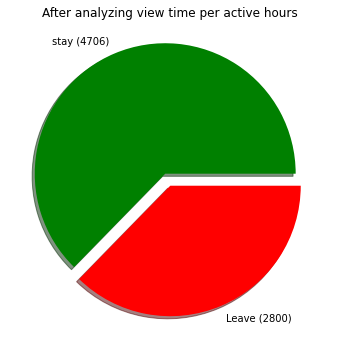

In [53]:
y=np.array([4706,2800])
label = ["stay (4706)" , "Leave (2800)"]
fig = plt.figure(figsize=(6,6))
newexplode = [0.1,0]
newcolor = ['green','red']
plt.pie(y,labels=label,explode=newexplode,colors=newcolor,shadow=True)

plt.title("After analyzing view time per active hours")
#plt.legend(title= "According to Viewtime per active")
plt.show()

In [54]:
ott=[]
for i in info['ott_subscription']:
  if i == 'None':
    ott.append(0)
  else:
    ott.append(1)
info['ott']=ott
info


,names,address,city,phone_number,dth_pack,subscription_status,customer_class,ott_subscription,dth_pack_price,no_of_channels,active_since,viewtime,churn,no_of_hr,prob,ott
0,Autumn Jackson,"1166 Max Pine,Selenastad, OR 84999",Nicholasview,001-299-668-9887x055,Standard,True,Individual,None,350,400,1245,315,False,1.054217,Leave,0
1,Tiffany Molina,"2897 Kari Skyway,Thomasside, ID 62645",New Davidtown,986-452-8168x704,HD,True,Individual,None,500,450,164,77,False,1.956301,Leave,0
2,Andre King,"9308 Williams Islands,Shawnborough, UT 79074",Michaelshire,+1-652-466-9356x692,HD,True,Individual,None,500,450,773,27,True,0.145537,Leave,0
3,Dale Franco,"989 Elizabeth Isle,Mayport, DC 08154",Lake Margaret,238.412.9721x813,HD,False,Home,Hulu,500,450,0,5632,True,inf,Stay,1
4,Kimberly Taylor,"Unit 8082 Box 6829,DPO AP 84673",Justinbury,530.337.6650x868,Standard,True,Home,Netflix,350,400,814,91,False,0.465807,Leave,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Kenneth Meadows,"257 Gonzalez Plaza Suite 874,Jenniferberg, TX ...",West Douglasbury,(099)701-9100x92220,Standard,True,Individual,None,350,400,1931,842,False,1.816848,Leave,0
9996,James Barrett,"095 Richard Path,Heatherfort, NC 16640",Christinefurt,7611399892,Standard,False,Individual,Other,350,400,0,8299,False,inf,Stay,1
9997,Barbara Torres,"6232 Melissa Valleys Apt. 625,Whitebury, NV 73519",West Anthonyville,(254)791-1312,UHD,False,Commercial,Hulu,700,500,0,2635,False,inf,Stay,1
9998,James Williams,"49214 Sierra Brook Apt. 166,Port Jessica, IL 2...",Port Jennifertown,336.043.6761x397,HD,True,Home,None,500,450,1436,627,False,1.819290,Leave,0


In [55]:
test1 = info[(info['ott']== 1 )]
test1


,names,address,city,phone_number,dth_pack,subscription_status,customer_class,ott_subscription,dth_pack_price,no_of_channels,active_since,viewtime,churn,no_of_hr,prob,ott
3,Dale Franco,"989 Elizabeth Isle,Mayport, DC 08154",Lake Margaret,238.412.9721x813,HD,False,Home,Hulu,500,450,0,5632,True,inf,Stay,1
4,Kimberly Taylor,"Unit 8082 Box 6829,DPO AP 84673",Justinbury,530.337.6650x868,Standard,True,Home,Netflix,350,400,814,91,False,0.465807,Leave,1
5,James Sanchez,"24253 Williams Passage Suite 512,Amyberg, SD 0...",Port Stephen,(794)166-4960x466,Standard,False,Individual,Netflix,350,400,0,4592,False,inf,Stay,1
6,Brian Graham,"7138 Peter Forges,Rebeccachester, FL 56150",Lake Cameron,001-309-833-3245,Standard,True,Home,Amazon Prime Video,350,400,1946,888,False,1.901336,Leave,1
8,Cynthia Hurst,"692 West Island,West Ryanside, MT 36752",North Paul,001-759-287-7473,HD,True,Commercial,Amazon Prime Video,500,450,12,3,False,1.041667,Leave,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,Cory Gibson,"PSC 7457, Box 2284,APO AE 98267",Hartland,662-020-7262x02817,Standard,False,Individual,Netflix,350,400,0,6740,False,inf,Stay,1
9994,Eric Harris,"PSC 1621, Box 0290,APO AA 05690",South Michael,253-119-4365,HD,True,Home,Amazon Prime Video,500,450,1352,421,False,1.297461,Leave,1
9996,James Barrett,"095 Richard Path,Heatherfort, NC 16640",Christinefurt,7611399892,Standard,False,Individual,Other,350,400,0,8299,False,inf,Stay,1
9997,Barbara Torres,"6232 Melissa Valleys Apt. 625,Whitebury, NV 73519",West Anthonyville,(254)791-1312,UHD,False,Commercial,Hulu,700,500,0,2635,False,inf,Stay,1


In [56]:
Will_Leave = 0
Might_Leave = 0
for i in test1['prob']:
  if i == 'Leave':
    Will_Leave+=1
  else :
    Might_Leave+=1

print(Will_Leave)
print(Might_Leave)



5647
1874


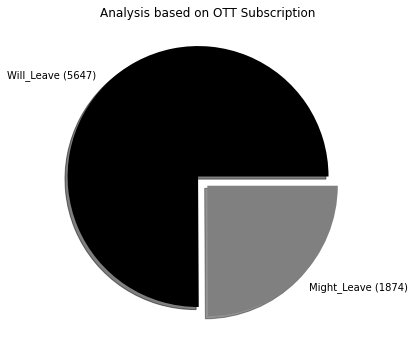

In [57]:
y=np.array([Will_Leave,Might_Leave])
label = ["Will_Leave (5647)", "Might_Leave (1874)"]
fig = plt.figure(figsize=(6,6))
newexplode = [0.1,0]
newcolor = ['black','grey'] 
plt.pie(y,labels=label, explode=newexplode, shadow=True, colors=newcolor)

plt.title("Analysis based on OTT Subscription")
#plt.legend(title= "According to Viewtime per active")
plt.show()

In [58]:
Leave_status=[]
for i in test1['prob']:
  if i == 'Leave':
    Leave_status.append('Will_Leave')
  else:
    Leave_status.append('Might_Leave')
test1['Leave_status']= Leave_status
test1


,names,address,city,phone_number,dth_pack,subscription_status,customer_class,ott_subscription,dth_pack_price,no_of_channels,active_since,viewtime,churn,no_of_hr,prob,ott,Leave_status
3,Dale Franco,"989 Elizabeth Isle,Mayport, DC 08154",Lake Margaret,238.412.9721x813,HD,False,Home,Hulu,500,450,0,5632,True,inf,Stay,1,Might_Leave
4,Kimberly Taylor,"Unit 8082 Box 6829,DPO AP 84673",Justinbury,530.337.6650x868,Standard,True,Home,Netflix,350,400,814,91,False,0.465807,Leave,1,Will_Leave
5,James Sanchez,"24253 Williams Passage Suite 512,Amyberg, SD 0...",Port Stephen,(794)166-4960x466,Standard,False,Individual,Netflix,350,400,0,4592,False,inf,Stay,1,Might_Leave
6,Brian Graham,"7138 Peter Forges,Rebeccachester, FL 56150",Lake Cameron,001-309-833-3245,Standard,True,Home,Amazon Prime Video,350,400,1946,888,False,1.901336,Leave,1,Will_Leave
8,Cynthia Hurst,"692 West Island,West Ryanside, MT 36752",North Paul,001-759-287-7473,HD,True,Commercial,Amazon Prime Video,500,450,12,3,False,1.041667,Leave,1,Will_Leave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,Cory Gibson,"PSC 7457, Box 2284,APO AE 98267",Hartland,662-020-7262x02817,Standard,False,Individual,Netflix,350,400,0,6740,False,inf,Stay,1,Might_Leave
9994,Eric Harris,"PSC 1621, Box 0290,APO AA 05690",South Michael,253-119-4365,HD,True,Home,Amazon Prime Video,500,450,1352,421,False,1.297461,Leave,1,Will_Leave
9996,James Barrett,"095 Richard Path,Heatherfort, NC 16640",Christinefurt,7611399892,Standard,False,Individual,Other,350,400,0,8299,False,inf,Stay,1,Might_Leave
9997,Barbara Torres,"6232 Melissa Valleys Apt. 625,Whitebury, NV 73519",West Anthonyville,(254)791-1312,UHD,False,Commercial,Hulu,700,500,0,2635,False,inf,Stay,1,Might_Leave


In [59]:
test2 = test1[(test1['Leave_status']== 'Will_Leave' )]
test2

,names,address,city,phone_number,dth_pack,subscription_status,customer_class,ott_subscription,dth_pack_price,no_of_channels,active_since,viewtime,churn,no_of_hr,prob,ott,Leave_status
4,Kimberly Taylor,"Unit 8082 Box 6829,DPO AP 84673",Justinbury,530.337.6650x868,Standard,True,Home,Netflix,350,400,814,91,False,0.465807,Leave,1,Will_Leave
6,Brian Graham,"7138 Peter Forges,Rebeccachester, FL 56150",Lake Cameron,001-309-833-3245,Standard,True,Home,Amazon Prime Video,350,400,1946,888,False,1.901336,Leave,1,Will_Leave
8,Cynthia Hurst,"692 West Island,West Ryanside, MT 36752",North Paul,001-759-287-7473,HD,True,Commercial,Amazon Prime Video,500,450,12,3,False,1.041667,Leave,1,Will_Leave
11,Jordan Valenzuela,"7032 Jones Field,Hernandezmouth, HI 72519",Port Brandi,(467)765-5891,UHD,True,Commercial,Other,700,500,1242,27,True,0.090580,Leave,1,Will_Leave
12,Kimberly Chambers,"85512 Baker Union,Stevenbury, AK 69663",Brookefurt,9695775541,Standard,True,Home,Amazon Prime Video,350,400,1686,81,False,0.200178,Leave,1,Will_Leave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,Jessica Jennings,"0850 Graham Grove Apt. 293,Lake Samanthatown, ...",New Christian,070-223-0184x3182,Standard,True,Home,Other,350,400,911,233,False,1.065679,Leave,1,Will_Leave
9991,John Webb,"40934 Brian Cove Suite 136,Nicholstown, GA 75659",West Scottshire,199-215-5199,Standard,True,Individual,Hulu,350,400,1175,445,False,1.578014,Leave,1,Will_Leave
9992,Allison Coleman,"72518 Evans Port,Lisaport, GA 91226",Robertborough,001-382-210-9648x566,Standard,True,Home,Netflix,350,400,814,287,False,1.469083,Leave,1,Will_Leave
9994,Eric Harris,"PSC 1621, Box 0290,APO AA 05690",South Michael,253-119-4365,HD,True,Home,Amazon Prime Video,500,450,1352,421,False,1.297461,Leave,1,Will_Leave


In [60]:
Definitely = 0
Maybe = 0
for i in test2['customer_class']:
  if i == 'Individual':
    Definitely+=1
  else:
    Maybe+=1
print(Definitely)
print(Maybe)


3408
2239


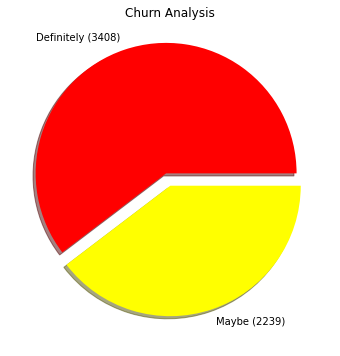

In [61]:
y=np.array([Definitely,Maybe])
label = ["Definitely (3408)", "Maybe (2239)"]
fig = plt.figure(figsize=(6,6))
newexplode = [0.1,0]
newcolor = ['red','yellow'] 
plt.pie(y,labels=label, explode=newexplode, shadow=True, colors=newcolor)

plt.title("Churn Analysis")
#plt.legend(title= "According to Viewtime per active")
plt.show()